## Package Import


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

## Stating the problem and import Data

In [3]:
data = pd.read_csv('customer churn.csv')

In [9]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3052,5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
2772,3470-OBUET,Female,0,Yes,Yes,67,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,Two year,No,Credit card (automatic),74.00,4868.40,No
1634,9995-HOTOH,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60,No
426,2806-MLNTI,Male,1,Yes,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),105.10,5376.40,No
6561,6339-YPSAH,Male,0,No,No,9,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.80,704.30,No


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
# column count
jumlah_kolom = len(data.columns)
f'{jumlah_kolom = } kolom'

'jumlah_kolom = 21 kolom'

In [11]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
col_cat=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
col_num=['tenure','MonthlyCharges','TotalCharges']


In [13]:
# change target into numerical target
# from churn value "Yes" or "No" to actual_churn 0 or 1
data['actual_churn']=(data['Churn']=='Yes').astype(int)
target=['actual_churn']

In [15]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,actual_churn
2554,5843-TTHGI,Female,0,No,No,18,Yes,No,DSL,No,...,No,No,No,Month-to-month,Yes,Mailed check,50.00,892.70,No,0
6518,1963-SVUCV,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes,1
6778,5893-KCLGT,Female,0,No,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.75,1567.00,No,0
438,5886-VLQVU,Male,0,Yes,No,35,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.85,3161.20,No,0
6994,0804-YGEQV,Female,0,Yes,Yes,43,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.45,993.15,No,0


## Check Data

In [16]:
data.shape

(7043, 22)

In [17]:
# check data null
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
actual_churn         0
dtype: int64

In [18]:
data['actual_churn'].std()

0.44156130512195013

<Axes: ylabel='Frequency'>

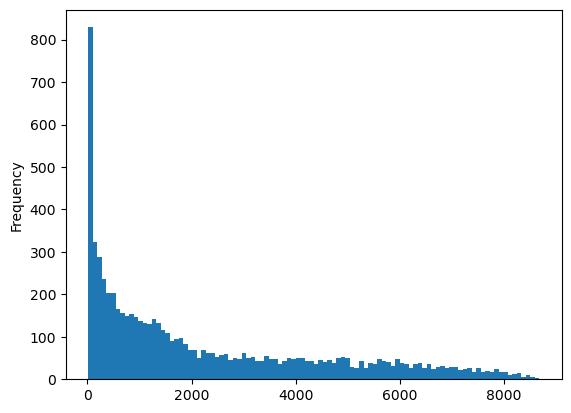

In [19]:
data['TotalCharges'].plot(kind='hist', bins=100)

In [20]:
median = data['TotalCharges'].median()
median

1397.475

In [21]:
mean = data['TotalCharges'].mean()
mean

2283.3004408418656

In [22]:
data['TotalCharges']=data['TotalCharges'].fillna(median)

In [23]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
actual_churn        0
dtype: int64

In [24]:
data.groupby('gender').agg({target[0]:['mean', 'std', np.size]})

actual_churn                
               mean       std  size
gender                             
Female     0.269209  0.443612  3488
Male       0.261603  0.439570  3555

## Feature Engineering

In [25]:
# categorical handling

onehot=OneHotEncoder()
onehot.fit(data[col_cat])

OneHotEncoder()

In [26]:

for i, j in zip(col_cat, onehot.categories_):
    print(f'{i}:')
    for e in j:
        print(f'=>{e}')

gender:
=>Female
=>Male
SeniorCitizen:
=>0
=>1
Partner:
=>No
=>Yes
Dependents:
=>No
=>Yes
PhoneService:
=>No
=>Yes
MultipleLines:
=>No
=>No phone service
=>Yes
InternetService:
=>DSL
=>Fiber optic
=>No
OnlineSecurity:
=>No
=>No internet service
=>Yes
OnlineBackup:
=>No
=>No internet service
=>Yes
DeviceProtection:
=>No
=>No internet service
=>Yes
TechSupport:
=>No
=>No internet service
=>Yes
StreamingTV:
=>No
=>No internet service
=>Yes
StreamingMovies:
=>No
=>No internet service
=>Yes
Contract:
=>Month-to-month
=>One year
=>Two year
PaperlessBilling:
=>No
=>Yes
PaymentMethod:
=>Bank transfer (automatic)
=>Credit card (automatic)
=>Electronic check
=>Mailed check


In [27]:
col_cat2=[]
for i, j in zip(col_cat, onehot.categories_):
    for e in j:
#         concat field + category
            col_cat2.append(str(i)+'_'+str(e)) 


In [28]:
col_cat2

['gender_Female',
 'gender_Male',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'Paym

In [29]:
data[col_cat2]=pd.DataFrame(onehot.transform(data[col_cat]).toarray())

In [30]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
data.shape

(7043, 65)

In [32]:
data.dtypes

customerID                                  object
gender                                      object
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
                                            ...   
PaperlessBilling_Yes                       float64
PaymentMethod_Bank transfer (automatic)    float64
PaymentMethod_Credit card (automatic)      float64
PaymentMethod_Electronic check             float64
PaymentMethod_Mailed check                 float64
Length: 65, dtype: object

In [33]:
# Numerical handling

SS = StandardScaler()
SS.fit(data[col_num])

col_num2=[c+'_SS' for c in col_num]
data[col_num2]=pd.DataFrame(SS.transform(data[col_num]))

In [34]:
data.dtypes

customerID                         object
gender                             object
SeniorCitizen                       int64
Partner                            object
Dependents                         object
                                   ...   
PaymentMethod_Electronic check    float64
PaymentMethod_Mailed check        float64
tenure_SS                         float64
MonthlyCharges_SS                 float64
TotalCharges_SS                   float64
Length: 68, dtype: object

In [35]:
data['log_TotalCharges']=np.log(data['TotalCharges'])
data['sqrt_tenure']=np.sqrt(data['tenure'])
data['charge_per_tenure']=data['TotalCharges']/(data['tenure']+1)

col_transform=['log_TotalCharges', 'sqrt_tenure', 'charge_per_tenure']

In [36]:
corr_values = data[col_cat2+col_transform+target].corr()[target[0]].abs().sort_values()
corr_values

gender_Female                              0.008612
gender_Male                                0.008612
PhoneService_Yes                           0.011942
MultipleLines_No phone service             0.011942
PhoneService_No                            0.011942
charge_per_tenure                          0.014873
MultipleLines_No                           0.032569
MultipleLines_Yes                          0.040102
StreamingMovies_Yes                        0.061382
StreamingTV_Yes                            0.063228
DeviceProtection_Yes                       0.066160
OnlineBackup_Yes                           0.082255
PaymentMethod_Mailed check                 0.091683
PaymentMethod_Bank transfer (automatic)    0.117937
InternetService_DSL                        0.124214
StreamingTV_No                             0.128916
StreamingMovies_No                         0.130845
PaymentMethod_Credit card (automatic)      0.134302
Partner_Yes                                0.150448
Partner_No  

In [38]:
# get median value
treshold = corr_values.median()
treshold

0.16422140157972545

In [39]:
corr_values[corr_values>treshold].index.tolist()

['TechSupport_Yes',
 'OnlineSecurity_Yes',
 'Contract_One year',
 'PaperlessBilling_Yes',
 'PaperlessBilling_No',
 'StreamingMovies_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'InternetService_No',
 'StreamingTV_No internet service',
 'log_TotalCharges',
 'DeviceProtection_No',
 'OnlineBackup_No',
 'PaymentMethod_Electronic check',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'TechSupport_No',
 'OnlineSecurity_No',
 'sqrt_tenure',
 'Contract_Month-to-month',
 'actual_churn']

In [40]:
col_used = corr_values[corr_values>treshold].index.tolist()
col_used.sort()
col_used.remove(target[0])

In [41]:
col_used

['Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'log_TotalCharges',
 'sqrt_tenure']

In [42]:
col_remove = ['Contract_Month-to-month',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'InternetService_No',
 'OnlineBackup_No',
 'OnlineSecurity_No',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Electronic check',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 ]
for c in col_remove:
    col_used.remove(c)

In [43]:
col_used

['Contract_One year',
 'Contract_Two year',
 'InternetService_Fiber optic',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'log_TotalCharges',
 'sqrt_tenure']

In [44]:
X = data[col_used]
y = data[target].values.reshape(len(data))

In [47]:
X.sample(5)


,Contract_One year,Contract_Two year,InternetService_Fiber optic,OnlineBackup_No internet service,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingMovies_No internet service,StreamingTV_No internet service,log_TotalCharges,sqrt_tenure
145,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,8.766659,8.062258
3172,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.803333,5.000000
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.458947,2.000000
6460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.388939,6.633250
2150,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.460174,4.582576


In [48]:
y

array([0, 0, 1, ..., 0, 1, 0])

## Split Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=418)

In [50]:
X_train.shape

(5634, 10)

In [51]:
X_test.shape

(1409, 10)

In [52]:
y_train.shape

(5634,)

In [53]:
y_test.shape

(1409,)

## Model Training

In [54]:
model_churn=RandomForestClassifier(n_estimators=10, max_depth=25, min_samples_split=3)

In [55]:
model_churn.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=3, n_estimators=10)

## Model Validation

In [56]:
def model_validation_metrics(confusion_matrix):
  tn, fp, fn, tp = confusion_matrix.ravel()
  return (tp+tn)/(tp+tn+fp+fn),tp/(tp+fp),tp/(tp+fn)

def roc_curve_func(y_true,y_score):
  # Compute fpr, tpr, thresholds and roc auc
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  roc_auc = roc_auc_score(y_true, y_score)

  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")

In [57]:
y_train_pred=model_churn.predict(X_train)
y_test_pred=model_churn.predict(X_test)

In [58]:
cm_train=confusion_matrix(y_train, y_train_pred)
cm_test=confusion_matrix(y_test, y_test_pred)

In [59]:
# data training
cm_train

array([[4064,   88],
       [ 213, 1269]])

In [60]:
# data test
cm_test

array([[881, 141],
       [198, 189]])

accuracy : 0.9465743698970536
precision : 0.9351510685335298
recall : 0.8562753036437247


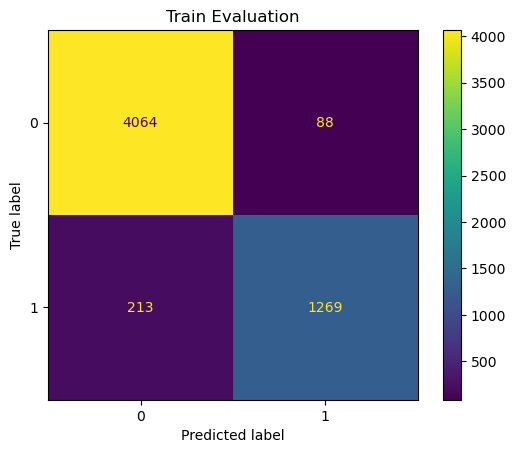

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model_churn.classes_)
disp.plot()
disp.ax_.set_title('Train Evaluation')
accuracy,precision,recall=model_validation_metrics(cm_train)
print("accuracy :",accuracy)
print("precision :",precision)
print("recall :",recall)

accuracy : 0.759403832505323
precision : 0.5727272727272728
recall : 0.4883720930232558


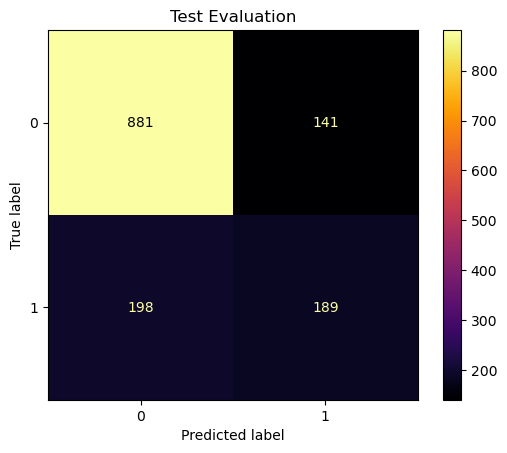

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model_churn.classes_)
disp.plot(cmap='inferno')
disp.ax_.set_title('Test Evaluation')
accuracy,precision,recall=model_validation_metrics(cm_test)
print("accuracy :",accuracy)
print("precision :",precision)
print("recall :",recall)

In [53]:
# Benchmarking

max(1-data[target].mean().values[0], data[target].mean().values[0])

0.7346301292063041

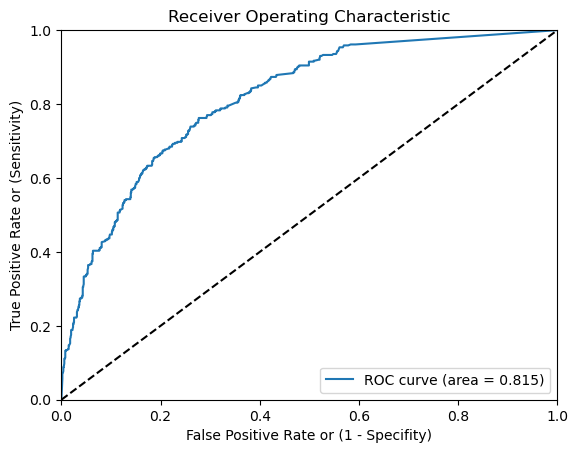

In [54]:
## ROC Curve
y_test_pred=model_churn.predict(X_test)
y_test_pred_proba=model_churn.predict_proba(X_test)[:,1]

roc_curve_func(y_test,y_test_pred_proba)